Problem Statement:
  The aim is to analyse the data to provide actionable recommendations for Netflix's content strategy and to improve business.It suggests using data insights to  analyze content trends, audience preferences, and performance metrics to understand what resonates with viewers.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
a = pd.read_csv("Python Libraries Case Study.csv")
a.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [58]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
a.ndim,a.shape

(2, (8807, 12))

The data contains 8807 rows and 12 columns with object datatype

Count of Movies/TV Shows

Using split and explode

In [60]:
b = a.copy()
b["type"] = b["type"].str.split(",")#Split the string values
b = b.explode("type")#Explode the list-like column
b["type"] = b["type"].str.strip()#Remove leading/trailing whitespaces
b["title"] = b["title"].str.split(",")#Split the string values
b = b.explode("title")#Explode the list-like column
b["title"] = b["title"].str.strip()
b.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [61]:
b["type"].isna().sum()

0

Count Plot for Movies/TV Shows

In [62]:
c = b["type"].value_counts()
c

,count
type,
Movie,6244
TV Show,2717


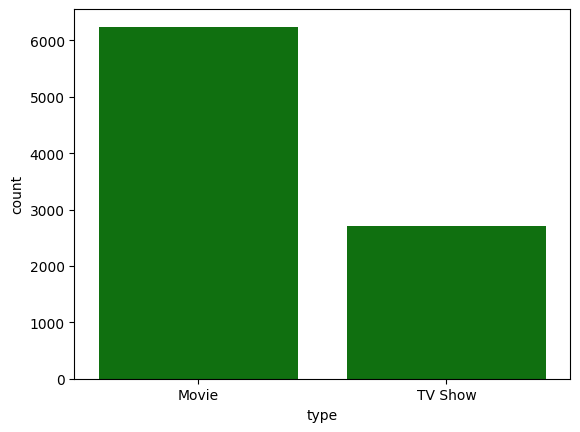

In [63]:
c_count_plot = sns.countplot(x = "type",data = b,order = b["type"].value_counts().index,color = "green")

Count of directors for Movies/TV Shows


In [64]:
d = a.copy()
d["type"] = d["type"].str.split(",")#Split the string values
d = d.explode("type")#Explode the list-like column
d["type"] = d["type"].str.strip()#Remove leading/trailing whitespaces
d["title"] = d["title"].str.split(",")#Split the string values
d = d.explode("title")#Explode the list-like column
d["title"] = d["title"].str.strip()
d["director"] = d["director"].str.split(",")#Split the string values
d = d.explode("director")#Explode the list-like column
d["director"] = d["director"].str.strip()#Remove leading/trailing whitespaces

In [65]:
d["director"] = d["director"].fillna("Unknown director")

In [66]:
movie_director = d[d["type"] == "Movie"]['director'].nunique()
movie_director

4778

In [67]:
show_director = d[d["type"] == "TV Show"]['director'].nunique()
show_director

300

The number of directors who directed for Movie is 4778 and the number of directors who directed for TV Show is 300

Text(0.5, 1.0, 'Count of Directors')

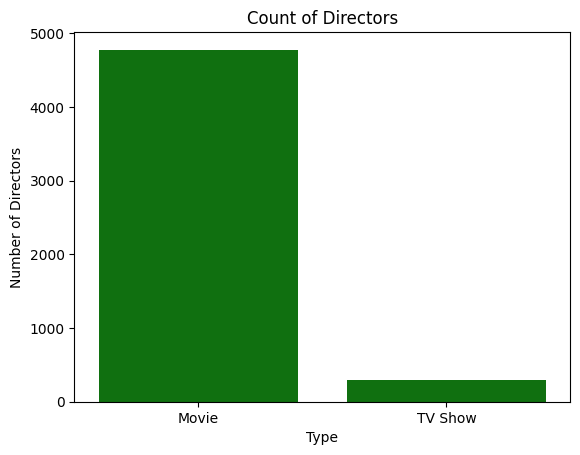

In [68]:
director_barplot = sns.barplot(x = ["Movie","TV Show"],y = [movie_director,show_director],color = "green")
plt.xlabel("Type")
plt.ylabel("Number of Directors")
plt.title("Count of Directors")

Count of Countries by title

In [69]:
e = d.copy()
e["country"] = e["country"].str.split(",")#Split the string values
e = e.explode("country")#Explode the list-like column
e["country"] = e["country"].str.strip()#Remove leading/trailing whitespaces

In [70]:
e["country"] = e["country"].fillna("Unknown country")

In [71]:
e.groupby("country")["title"].count().sort_values(ascending = False)

,title
country,
United States,4159
India,1136
Unknown country,898
United Kingdom,866
Canada,507
...,...
Samoa,1
Slovakia,1
Somalia,1


Count of Genre of Movie/TV Show

In [72]:
f = a.copy()
f["type"] = f["type"].str.split(",")#Split the string values
f = f.explode("type")#Explode the list-like column
f["type"] = f["type"].str.strip()
f["listed_in"] = f["listed_in"].str.split(",")#Split the string values
f = f.explode("listed_in")#Explode the list-like column
f["listed_in"] = f["listed_in"].str.strip()

In [73]:
genre_count = f["listed_in"].value_counts()

Most produced (or) Most popular Genre Movie

In [74]:
genre_count.head(1)

,count
listed_in,
International Movies,2752


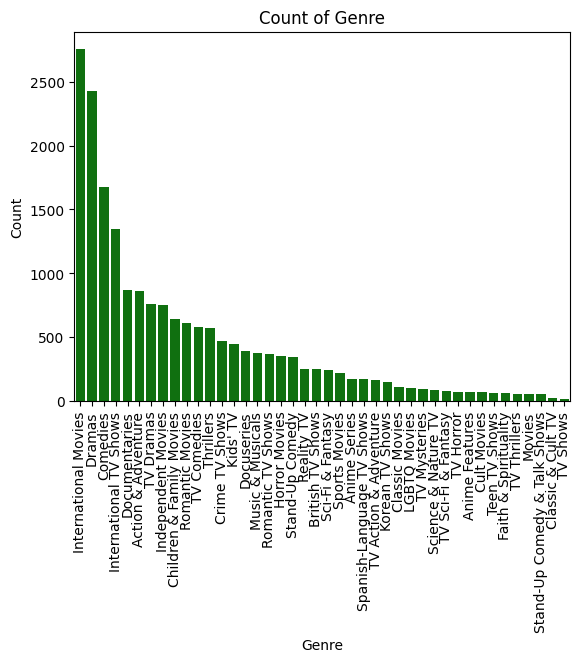

<Figure size 1200x600 with 0 Axes>

In [75]:
genre_countplot = sns.countplot(x = "listed_in",data = f,order = f["listed_in"].value_counts().index,color = "green")
plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Count of Genre")
plt.figure(figsize = (12,6))
plt.show()

Comparsion of Movies VS TV Shows

Countries that has  total number of movies

In [76]:
country_movie_counts = e[e["type"] == "Movie"].groupby("country")["title"].nunique().sort_values(ascending=False)
country_movie_counts

,title
country,
United States,2794
India,968
United Kingdom,540
Unknown country,450
Canada,324
...,...
Somalia,1
Dominican Republic,1
Liechtenstein,1


Top 10 Countries that has highest number of movies

In [77]:
country_movie_counts.head(10)

,title
country,
United States,2794
India,968
United Kingdom,540
Unknown country,450
Canada,324
France,308
Germany,185
Spain,175
Japan,123


Barplot Representation

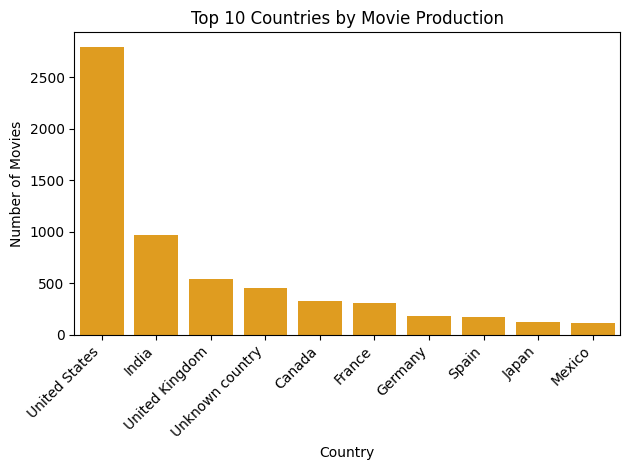

In [78]:
country_movie_barplot = sns.barplot(x = country_movie_counts.head(10).index,y = country_movie_counts.head(10),color = "orange")
top_10_countries = country_movie_counts.head(10)
plt.title('Top 10 Countries by Movie Production')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Countries that has total number of TV Shows

In [79]:
country_show_counts = e[e["type"] == "TV Show"].groupby("country")["title"].nunique().sort_values(ascending=False)
country_show_counts

,title
country,
United States,950
Unknown country,398
United Kingdom,273
Japan,200
South Korea,174
...,...
Switzerland,1
Hungary,1
Malta,1


Top 10 Countries that has highest number of TV Shows

In [80]:
country_show_counts.head(10)

,title
country,
United States,950
Unknown country,398
United Kingdom,273
Japan,200
South Korea,174
Canada,126
France,90
India,84
Taiwan,70


Pie Chart Representation

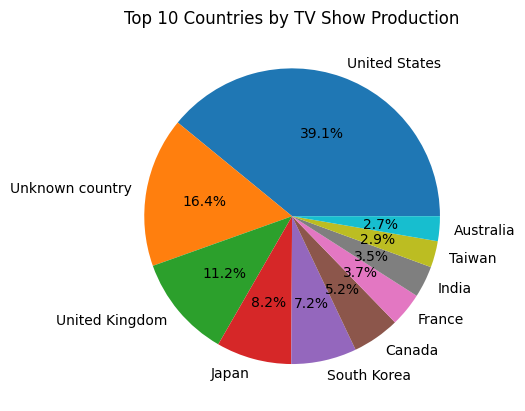

In [81]:
plt.pie(country_show_counts.head(10), labels=country_show_counts.head(10).index, autopct='%1.1f%%')
plt.title('Top 10 Countries by TV Show Production')
plt.show()

Best Week to launch a Movie

In [82]:
g = a.copy()
g["date_added"] = pd.to_datetime(g["date_added"],errors='coerce')
g['week_added'] = g['date_added'].dt.isocalendar().week

tv_shows_per_week = g[g["type"] == "Movie"].groupby('week_added')['title'].count().reset_index()
best_week_tv = tv_shows_per_week.sort_values(['title'], ascending=False).iloc[0]
best_week_tv

,0
week_added,1
title,316


In [83]:
g["date_added"] = pd.to_datetime(g["date_added"],errors='coerce')
g['week_added'] = g['date_added'].dt.isocalendar().week

tv_shows_per_week = g[g["type"] == "Movie"].groupby('week_added')['title'].count().reset_index()
best_week_tv = tv_shows_per_week.sort_values(['title'], ascending=False).iloc[0]
best_week_tv

,0
week_added,1
title,316


Best Week to lauch a TV Show

In [84]:
movies = g[g['type'] == 'TV Show']
movies_per_week = g[g["type"] == "TV Show"].groupby('week_added')['title'].count().reset_index()
best_week_movie = movies_per_week.sort_values(['title'], ascending=False).iloc[0]
best_week_movie

,26
week_added,27
title,85


Line Plot Representation for Best Weeks

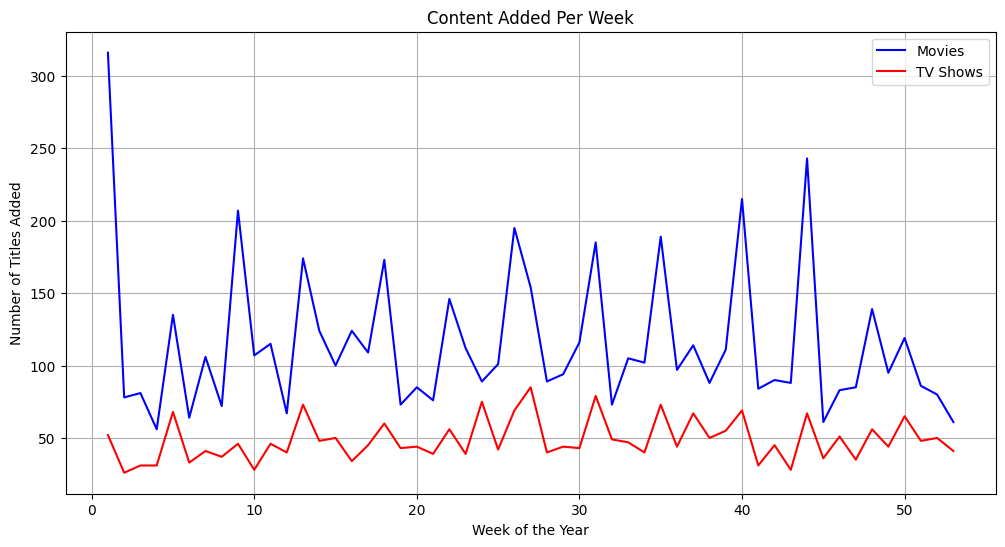

In [85]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='week_added', y='title', data=tv_shows_per_week, label='Movies', color='blue')
sns.lineplot(x='week_added', y='title', data=movies_per_week, label='TV Shows', color='red')
plt.title('Content Added Per Week')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Titles Added')
plt.legend()
plt.grid(True)
plt.show()

Top 5 Movie Weeks

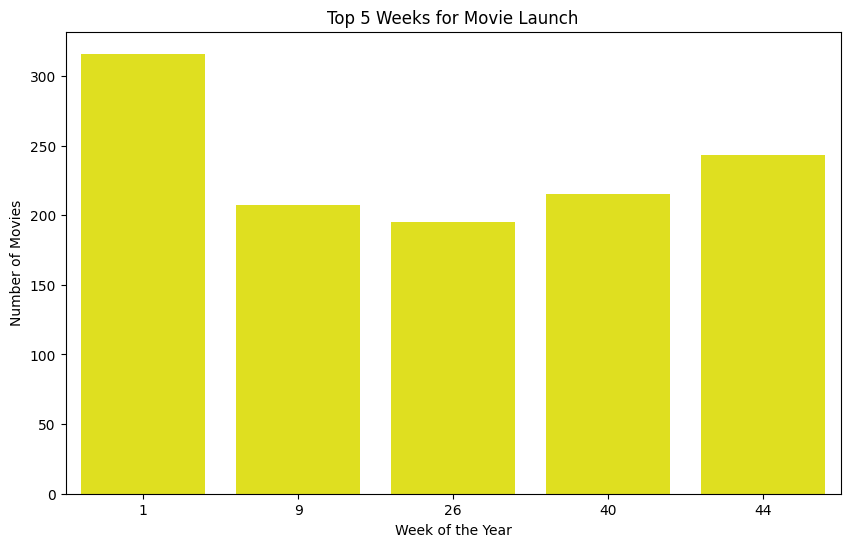

In [86]:
top_5_movie_weeks = tv_shows_per_week.sort_values('title',ascending=False).head(5)
plt.figure(figsize = (10,6))
sns.barplot(x = 'week_added',y = 'title',data = top_5_movie_weeks,color = 'yellow')
plt.title('Top 5 Weeks for Movie Launch')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Movies')
plt.show()

Top 5 TV Show Weeks

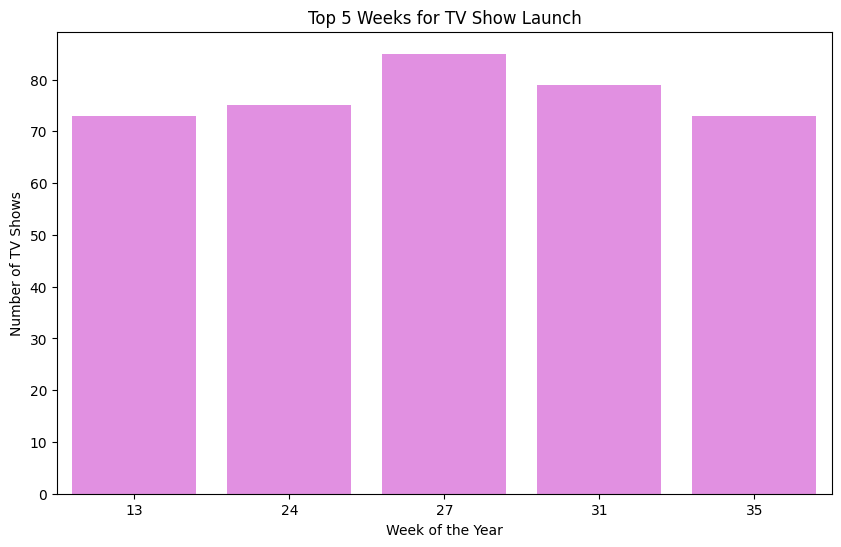

In [87]:
top_5_tv_show_weeks = movies_per_week.sort_values('title',ascending=False).head(5)
plt.figure(figsize = (10,6))
sns.barplot(x = 'week_added',y = 'title',data = top_5_tv_show_weeks,color = 'violet')
plt.title('Top 5 Weeks for TV Show Launch')
plt.xlabel('Week of the Year')
plt.ylabel('Number of TV Shows')
plt.show()

Best Month to lauch Movie

In [88]:
g['month_added'] = g['date_added'].dt.month_name()
movie_per_month = g[g["type"] == "Movie"].groupby('month_added')['title'].count().reset_index()
best_month_movie = movie_per_month.sort_values(['title'], ascending=False).iloc[0]
best_month_movie

,5
month_added,July
title,565


Best Month to lauch TV Show

In [89]:
tv_shows_per_month = g[g["type"] == "TV Show"].groupby('month_added')['title'].count().reset_index()
best_month_tv = tv_shows_per_month.sort_values(['title'], ascending=False).iloc[0]
best_month_tv

,5
month_added,July
title,254


Lineplot Representation

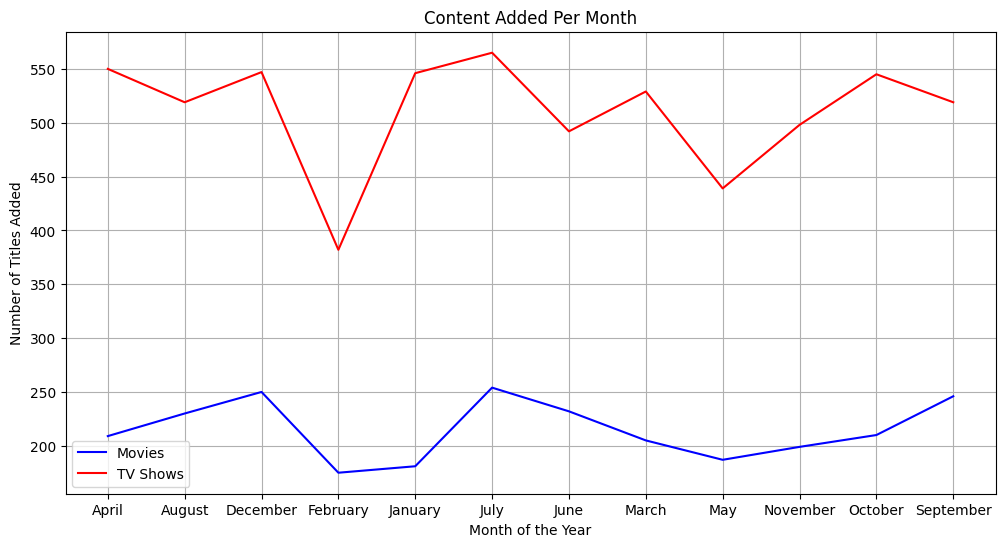

In [90]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_added', y='title', data=tv_shows_per_month, label='Movies', color='blue')
sns.lineplot(x='month_added', y='title', data=movie_per_month, label='TV Shows', color='red')
plt.title('Content Added Per Month')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Titles Added')
plt.legend()
plt.grid(True)
plt.show()

Top 5 Movie Month

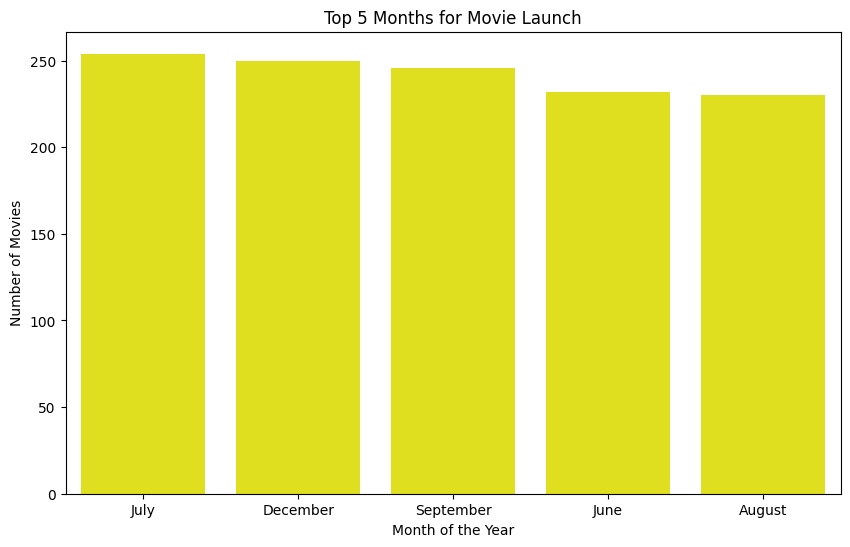

In [91]:
top_5_movie_months = tv_shows_per_month.sort_values('title',ascending=False).head(5)
plt.figure(figsize = (10,6))
sns.barplot(x = 'month_added',y = 'title',data = top_5_movie_months,color = 'yellow')
plt.title('Top 5 Months for Movie Launch')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Movies')
plt.show()

Top 5 TV Shows Month


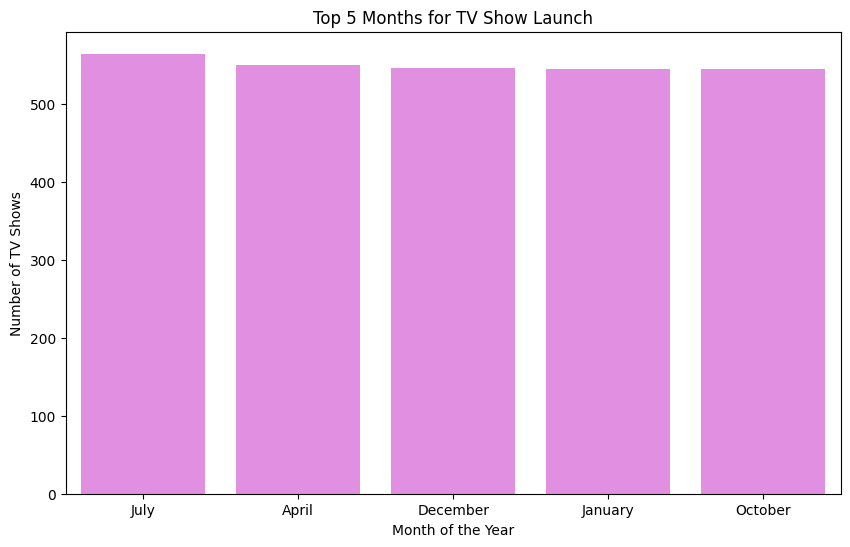

In [92]:
top_5_tv_show_months = movie_per_month.sort_values('title',ascending=False).head(5)
plt.figure(figsize = (10,6))
sns.barplot(x = 'month_added',y = 'title',data = top_5_tv_show_months,color = 'violet')
plt.title('Top 5 Months for TV Show Launch')
plt.xlabel('Month of the Year')
plt.ylabel('Number of TV Shows')
plt.show()

Directors who appeared in Movies/TV Shows

In [93]:
director_counts = d.groupby('director')['title'].nunique().sort_values(ascending=False)
director_counts

,title
director,
Unknown director,2670
Rajiv Chilaka,22
Jan Suter,22
Raúl Campos,19
Marcus Raboy,17
...,...
Julio Quintana,1
Julius Avery,1
Julius Onah,1


Top 10 Directors who appeared in most movies/TV Shows

In [94]:
director_counts[1:].head(10)

,title
director,
Rajiv Chilaka,22
Jan Suter,22
Raúl Campos,19
Marcus Raboy,17
Suhas Kadav,16
Cathy Garcia-Molina,15
Jay Karas,15
Jay Chapman,12
Martin Scorsese,12


Actors who appeared in Movies/TV Shows

In [95]:
# Identify the top 10 actors who have appeared in the most movies/TV shows
# Splitting and exploding the cast column
h = a.copy()
h["cast"] = h["cast"].str.split(",")
h = h.explode("cast")
h["cast"] = h["cast"].str.strip()
h["title"] = h["title"].str.split(",")
h = h.explode("title")
h["title"] = h["title"].str.strip()

In [96]:
h["cast"] = h["cast"].fillna("Unknown actor")

In [97]:
actor_counts = h.groupby('cast')['title'].nunique().sort_values(ascending=False)
actor_counts

,title
cast,
Unknown actor,844
Anupam Kher,43
Shah Rukh Khan,35
Naseeruddin Shah,35
Julie Tejwani,33
...,...
Jane Hallaren,1
Jane Darwell,1
Jane Daly,1


Top 10 Actors who appeared in most Movies/TV Shows

In [98]:
actor_counts[1:].head(10)

,title
cast,
Anupam Kher,43
Shah Rukh Khan,35
Naseeruddin Shah,35
Julie Tejwani,33
Takahiro Sakurai,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


 Days the movies will be added to Netflix after the release of the movies

In [124]:
z = a.copy()
z["date_added"] = pd.to_datetime(z["date_added"],errors='coerce')
z["release_year"] = pd.to_datetime(z["release_year"],format = "%Y",errors = "coerce")
z['days_to_add'] = (z['date_added'] - z['release_year']).dt.days
z["days_to_add"]
Days = z['days_to_add'].median() # I have used median() since there is outliners
Days

578.0

Histogram based on Movies/TV Shows Release Year

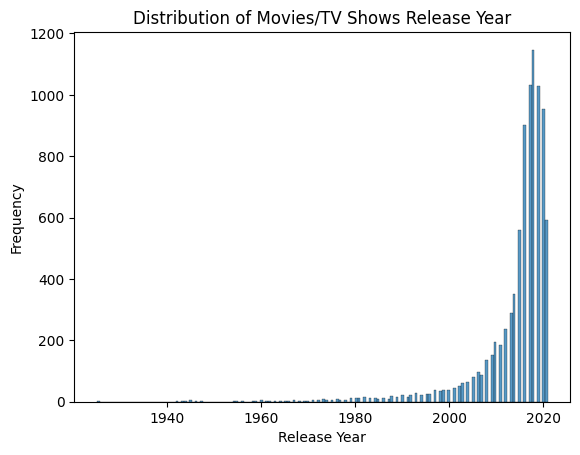

In [126]:
sns.histplot(a["release_year"])
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Distribution of Movies/TV Shows Release Year")
plt.show()

Boxplot of Rating by Type

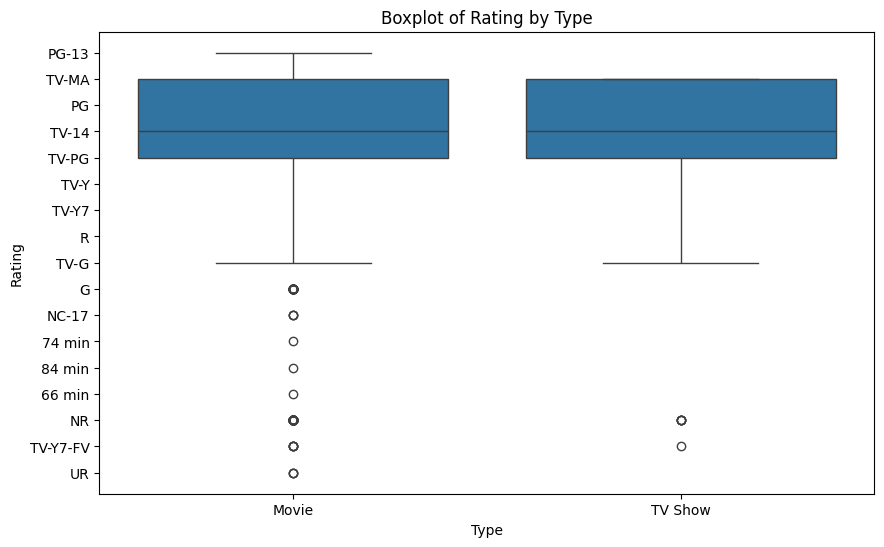

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=a)
plt.title('Boxplot of Rating by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

Scatterplot based on Release Year and Ratings of Movies/TV Shows

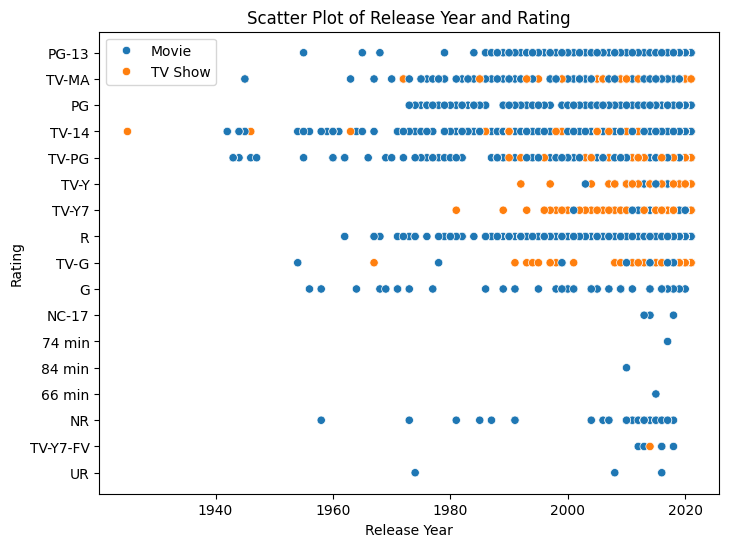

In [137]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='release_year', y='rating', data=a, hue='type')
plt.title("Scatter Plot of Release Year and Rating")
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.legend()
plt.show()

PairPlot based on Movies/TV Shows

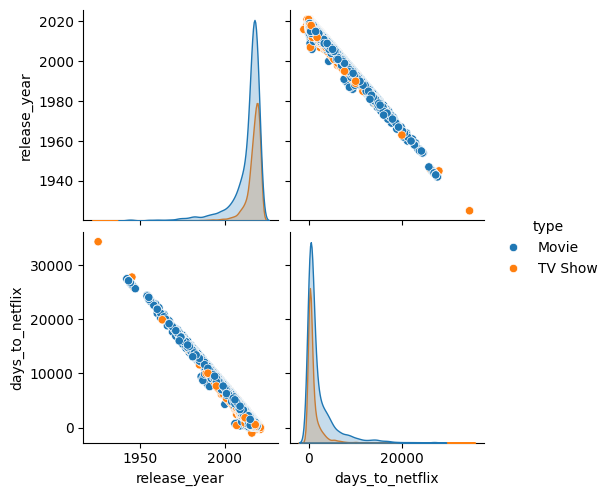

In [141]:
sns.pairplot(data = a,hue ="type")

Jointplot

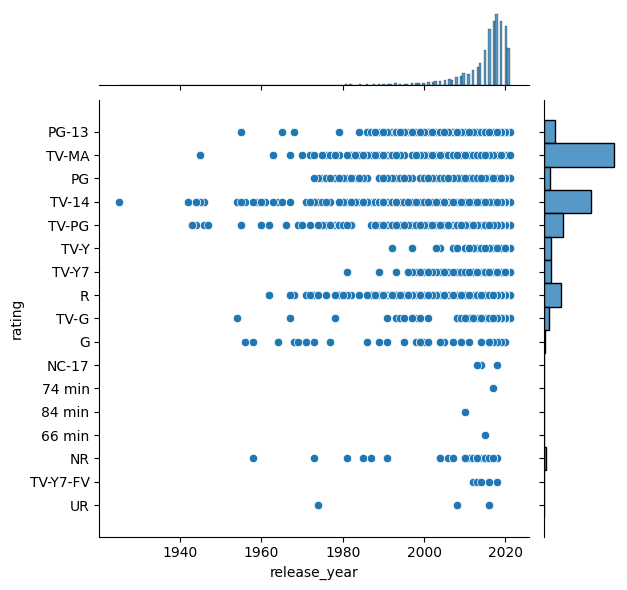

In [144]:
sns.jointplot(x='release_year', y='rating', data=a, kind='scatter')
plt.show()

Heatmap using Correlation Matrix

<Axes: >

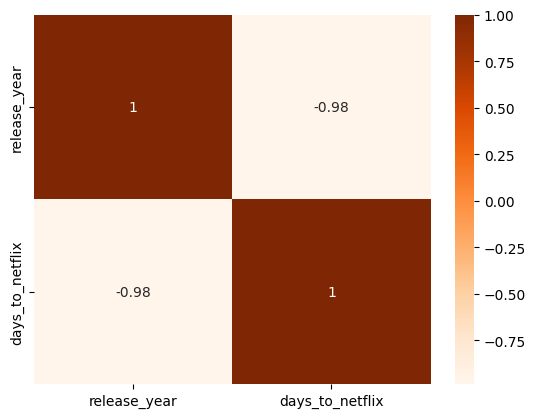

In [147]:
x = a.copy()
j = x.select_dtypes(include = [float,int])
j.corr()
sns.heatmap(data = j.corr(),annot = True,cmap = "Oranges")

Insights:
1.There are more number of movies present when compared with number of TV Shows.
2.Movies has a good number of rating when compared with TV Shows.
3.The frequency of releasing the Movies and TV Shows has gradually increased where the range starts from year 1940 till year 2020.The Highest frequency of releasing the movies and TV Shows is exactly from year 2000 till year 2020.
4.The United States stands as first country in terms of both movie production and TV Show production.India stands as second country in terms of movie production and seventh country in terms of TV Shows.
5.International Movies stands the first place and the most popular Genre movies followed by Dramas and Comedies.
6.The first week of the year has been the top week for movie lauch and 27th week of the year has benn the top week for TV Show launch.
7.July Month has been the top month for both Movie Lauch and TV Show Launch.
8.Rajiv Chilaka	and Jan Suter have been the top directors for appearing in most of the Movie/TV Shows.
9.Anupam Kher	have been the top actor followed by Shahrukh Khab for appearing in most of the Movie/TV Shows.

Reccomdations : International Movies can be launched more and it has been the most popular genre.
More TV shows in India can be launched since it is launched less when compared with movie launch.
Netflix can enhance the quality and curation of the movies more where rating of people to movies are getting increased gradually over years and the quality of movies and TV shows can be improved to have more customers.